In [1]:
# Cell 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [2]:
# ตั้งค่ากราฟ
plt.style.use("seaborn-v0_8-darkgrid")
sns.set(font_scale=1.2)
pd.set_option("display.max_columns", None)

# กลุ่มหุ้น Magnificent Five (จากที่คุณกำหนด)
TICKERS = ["AEP", "DUK", "SO", "ED", "EXC"]

# ดึงข้อมูลย้อนหลัง 5 ปี
data = {}
for t in TICKERS:
    df = yf.download(t, period="5y", auto_adjust=False)  # ❗ ใช้ False เพื่อเก็บทั้ง Price + Adj Close
    if not df.empty:
        df["Daily Return"] = df["Adj Close"].pct_change()
        data[t] = df
    else:
        print(f"⚠️ Warning: No data for {t}")

multi_df = pd.concat({t: data[t] for t in data.keys()}, axis=1)
multi_df.head()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AEP                                                       \
Price       Adj Close      Close       High        Low       Open   Volume   
Ticker            AEP        AEP        AEP        AEP        AEP      AEP   
Date                                                                         
2020-09-24  67.002480  80.489998  80.570000  78.580002  79.129997  3551500   
2020-09-25  67.135674  80.650002  80.889999  79.809998  80.309998  3252500   
2020-09-28  67.135674  80.650002  81.529999  80.459999  81.059998  1707900   
2020-09-29  67.402061  80.970001  81.559998  80.480003  81.010002  1688800   
2020-09-30  68.034698  81.730003  82.099998  81.239998  81.540001  2594900   

                               DUK                                   \
Price      Daily Return  Adj Close      Close       High        Low   
Ticker                         DUK        DUK        DUK        DUK   
Date                                                                  
2020-09-24          NaN  67.047493  81.669998  82.410004  80.410004   
2020-09-25     0.001988  67.704247  82.470001  82.589996  80.949997   
2020-09-28     0.000000  68.032631  82.870003  84.080002  82.660004   
2020-09-29     0.003968  67.654999  82.410004  83.400002  82.040001   
2020-09-30     0.009386  72.703880  88.559998  89.489998  86.430000   

                                                     SO                        \
Price            Open    Volume Daily Return  Adj Close      Close       High   
Ticker            DUK       DUK                      SO         SO         SO   
Date                                                                            
2020-09-24  81.230003   2582300          NaN  43.823132  53.049999  53.189999   
2020-09-25  81.279999   3854600     0.009795  44.450943  53.810001  53.849998   
2020-09-28  82.970001   2424600     0.004850  44.368340  53.709999  54.700001   
2020-09-29  83.070000   2126100    -0.005551  44.360077  53.700001  54.180000   
2020-09-30  88.000000  18804900     0.074627  44.789631  54.220001  54.500000   

                                                               ED             \
Price             Low       Open   Volume Daily Return  Adj Close      Close   
Ticker             SO         SO       SO                      ED         ED   
Date                                                                           
2020-09-24  52.009998  52.529999  3146300          NaN  61.733173  73.930000   
2020-09-25  52.529999  52.700001  3061900     0.014326  63.269611  75.769997   
2020-09-28  53.610001  54.000000  4436000    -0.001858  63.728878  76.320000   
2020-09-29  53.220001  53.950001  2951300    -0.000186  64.279984  76.980003   
2020-09-30  53.880001  53.980000  4659900     0.009683  64.964699  77.800003   

                                                                         EXC  \
Price            High        Low       Open   Volume Daily Return  Adj Close   
Ticker             ED         ED         ED       ED                     EXC   
Date                                                                           
2020-09-24  74.160004  72.550003  73.370003  1878100          NaN  20.793182   
2020-09-25  75.879997  73.470001  73.489998  1561400     0.024888  21.217295   
2020-09-28  77.160004  75.510002  75.980003  1657600     0.007259  21.348705   
2020-09-29  77.699997  76.250000  76.730003  1608500     0.008648  21.097826   
2020-09-30  78.059998  77.160004  77.449997  1773100     0.010652  21.360653   

                                                                              
Price           Close       High        Low       Open   Volume Daily Return  
Ticker            EXC        EXC        EXC        EXC      EXC               
Date                                                                          
2020-09-24  24.828815  25.071327  24.229671  24.472183  6442050          NaN  
2020-09-25  25.335236  25.420828  24.564907  24.736092  7285633     0.020397  
2020-09-28  25.492153  25.841

In [3]:
adj_close = pd.concat({t: data[t]["Adj Close"] for t in data.keys()}, axis=1)
adj_close.head()

,AEP,DUK,SO,ED,EXC
Ticker,AEP,DUK,SO,ED,EXC
Date,,,,,
2020-09-24,67.002480,67.047493,43.823132,61.733173,20.793182
2020-09-25,67.135674,67.704247,44.450943,63.269611,21.217295
2020-09-28,67.135674,68.032631,44.368340,63.728878,21.348705
2020-09-29,67.402061,67.654999,44.360077,64.279984,21.097826
2020-09-30,68.034698,72.703880,44.789631,64.964699,21.360653


In [4]:
adj_close.describe()

,AEP,DUK,SO,ED,EXC
Ticker,AEP,DUK,SO,ED,EXC
count,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000
mean,83.222889,93.413342,66.999718,82.855738,35.579930
std,11.453645,12.912333,12.948183,12.887583,5.560858
min,63.398193,67.047493,43.823132,55.941078,20.793182
25%,74.058826,84.591259,57.062771,72.111687,32.933599
50%,80.195213,89.767677,64.447773,85.041946,36.555866
75%,90.184757,99.803860,75.512260,90.295784,38.926240
max,114.059616,124.850685,95.244812,111.421585,46.536491


ใช้ yfinance โหลดข้อมูลหุ้น Magnificent Seven (AAPL, MSFT, GOOGL, AMZN, META, TSLA, NVDA) ตั้งแต่ปี 2023 ถึงต้นปี 2025

เก็บข้อมูลทั้งหมด (Open, High, Low, Close, Adj Close, Volume)

สร้าง feature Daily Return จากการเปลี่ยนแปลงของ Adj Close

รวมข้อมูลเป็น multi_df (หลายหุ้น หลาย feature) และ adj_close (เฉพาะราคาปรับแล้ว)

📌 จุดสำคัญ: ใช้ Adjusted Close เพราะปรับผลของ stock split และ dividend แล้ว เหมาะกับการวิเคราะห์ระยะยาว

### 📈 Cell 2 — Price Trend (แนวโน้มราคาแบบปรับแล้ว)

- ทำไมต้องใช้ Adj Close: ปรับผลของ split/dividend แล้ว เหมาะกับการเปรียบเทียบยาว ๆ

C:\Users\HP\AppData\Local\Temp\ipykernel_35044\1118573207.py:3: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(adj_close.index, adj_close[t], label=t)


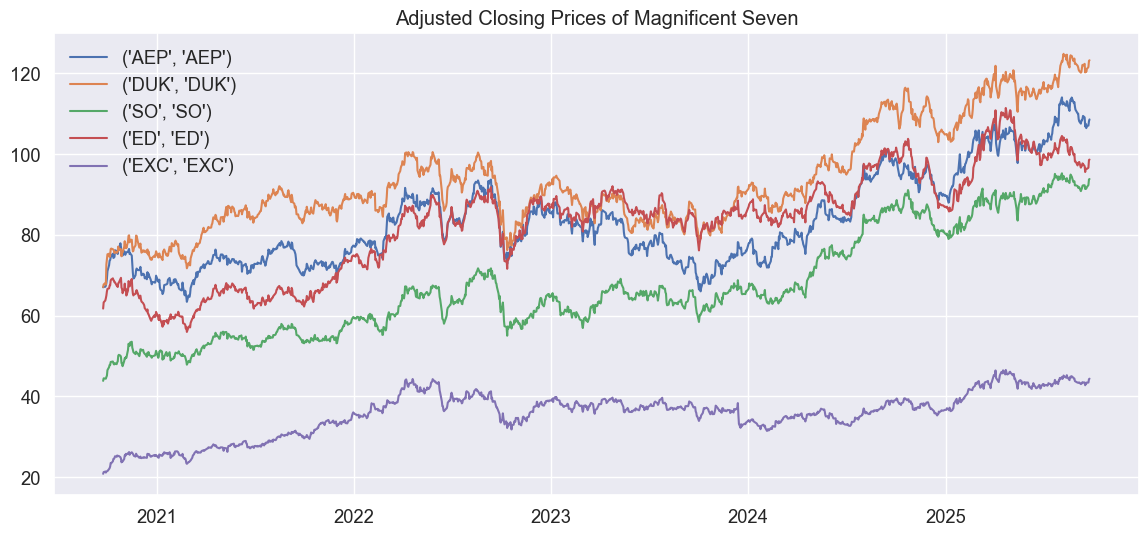

In [5]:
plt.figure(figsize=(14,6))
for t in adj_close.columns:
    plt.plot(adj_close.index, adj_close[t], label=t)
plt.title("Adjusted Closing Prices of Magnificent Seven")
plt.legend()
plt.show()


### 📉 Cell 3 — Daily Returns (ผลตอบแทนรายวัน)
- เหตุผล: การวิเคราะห์ “ผลตอบแทน” แทน “ราคา” ทำให้เปรียบเทียบต่างสเกลง่ายและใช้วัดความเสี่ยงได้

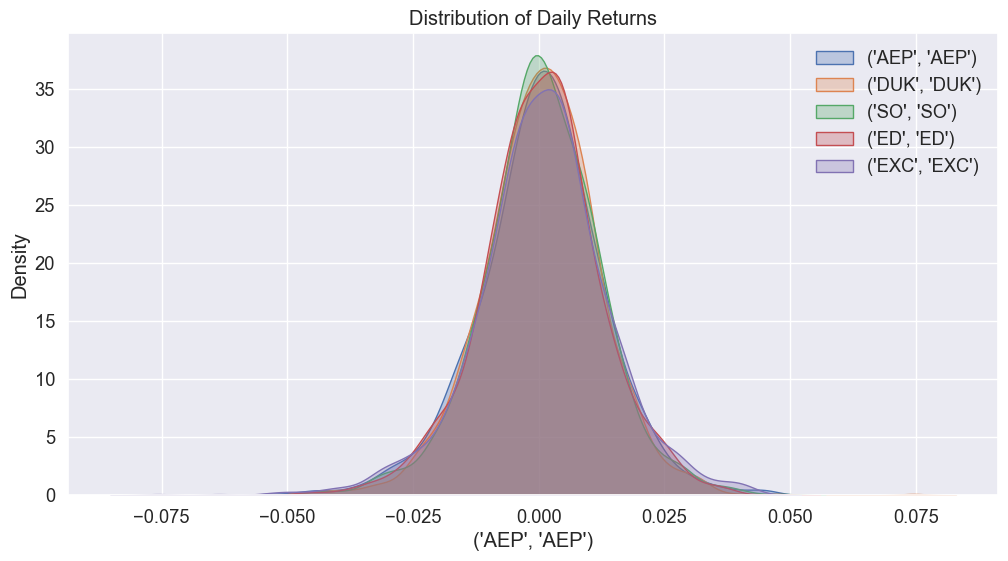

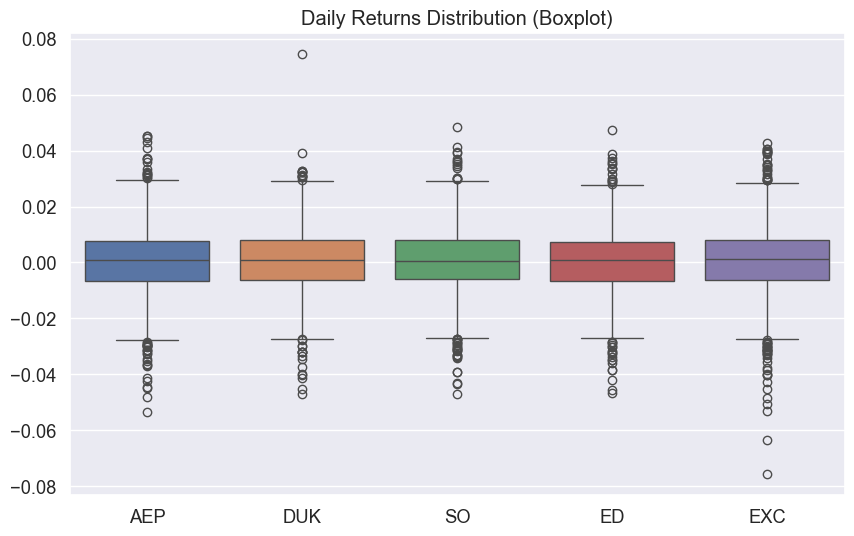

In [6]:
returns = adj_close.pct_change().dropna()

# KDE Plot
plt.figure(figsize=(12,6))
for t in returns.columns:
    sns.kdeplot(returns[t], label=t, fill=True, alpha=0.3)
plt.title("Distribution of Daily Returns")
plt.legend()
plt.show()

# Boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=returns)
plt.title("Daily Returns Distribution (Boxplot)")
plt.show()


KDE Plot (Distribution):

เส้นโค้งของผลตอบแทนรายวันแต่ละหุ้น

โค้งกว้าง = ผันผวนมาก (TSLA, NVDA)

โค้งแคบ = เสี่ยงน้อย (MSFT, AAPL)

Boxplot:

ใช้เทียบค่ากลางและ outlier

หุ้นที่มีหางยาว (long tail) = มี extreme move บ่อย

C:\Users\HP\AppData\Local\Temp\ipykernel_35044\920975957.py:4: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(vol, label=t)


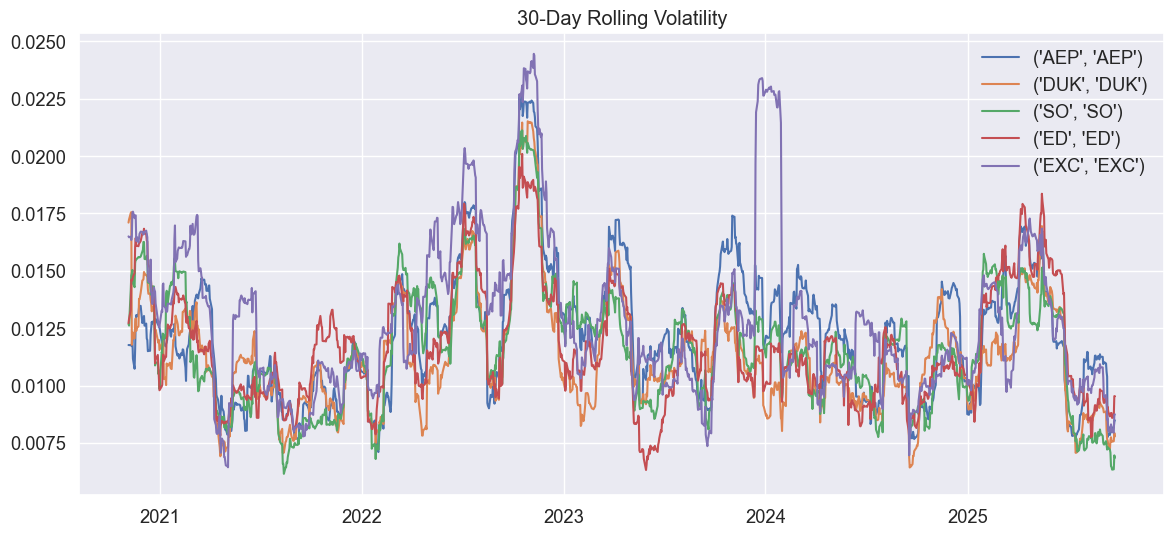

In [7]:
plt.figure(figsize=(14,6))
for t in returns.columns:
    vol = returns[t].rolling(30).std()
    plt.plot(vol, label=t)
plt.title("30-Day Rolling Volatility")
plt.legend()
plt.show()


กราฟ: ความผันผวนของผลตอบแทน (ค่าเบี่ยงเบนมาตรฐาน 30 วัน)

อธิบาย:

TSLA และ NVDA มี volatility พุ่งขึ้นในบางช่วง (ข่าวใหญ่/earnings)

MSFT และ AAPL มี volatility คงที่กว่ามาก

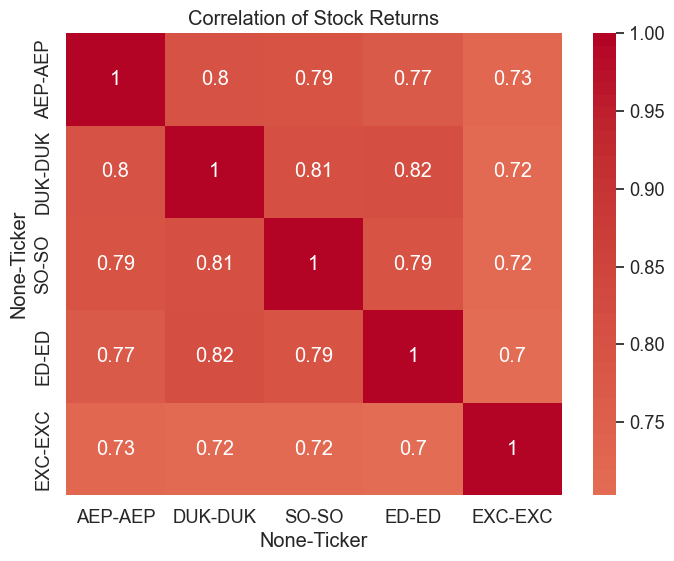

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(returns.corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation of Stock Returns")
plt.show()



กราฟ: Heatmap ความสัมพันธ์ของผลตอบแทนแต่ละหุ้น

อธิบาย:

AAPL–MSFT มี correlation สูง เพราะทั้งคู่เป็น tech blue-chip

TSLA correlation ค่อนข้างต่ำ → พอร์ตที่ใส่ TSLA กระจายความเสี่ยงได้

META และ GOOGL มี correlation กันสูง เพราะอยู่ในกลุ่ม digital ads

C:\Users\HP\AppData\Local\Temp\ipykernel_35044\1792285502.py:5: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(cumulative_returns.index, cumulative_returns[t], label=t)


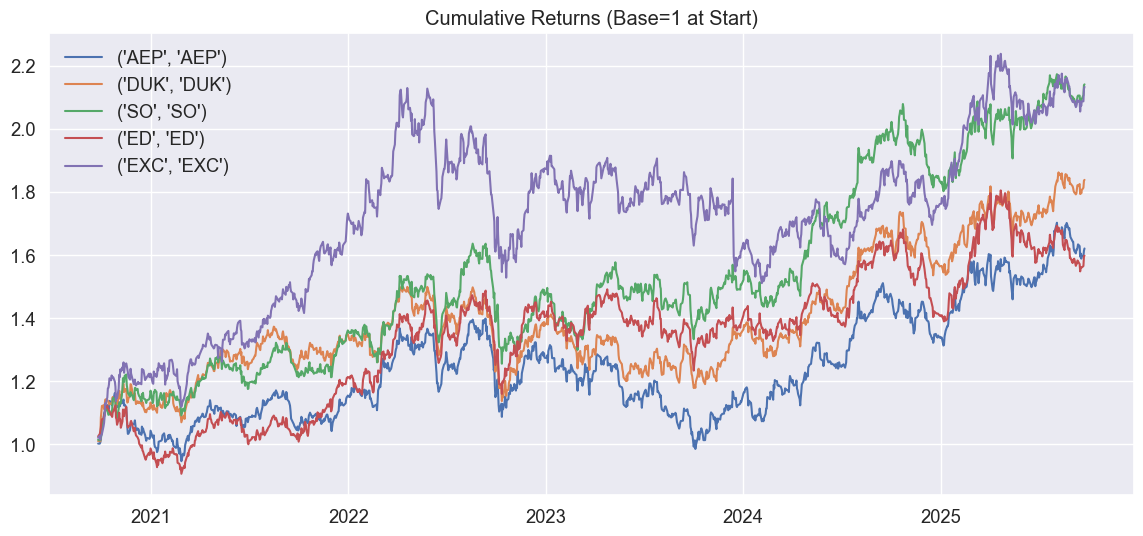

In [9]:
cumulative_returns = (1 + returns).cumprod()

plt.figure(figsize=(14,6))
for t in cumulative_returns.columns:
    plt.plot(cumulative_returns.index, cumulative_returns[t], label=t)
plt.title("Cumulative Returns (Base=1 at Start)")
plt.legend()
plt.show()



กราฟ: ผลตอบแทนสะสมตั้งแต่ปี 2023

อธิบาย:

NVDA outperform ทุกตัว (ราคาพุ่งจาก AI trend)

AAPL/MSFT ให้ผลตอบแทน steady positive

AMZN/META มีการแกว่ง แต่ยัง upward trend

TSLA มีทั้งช่วงพุ่งและร่วงแรง → เสี่ยงแต่มีโอกาส